In [37]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [38]:
data = pd.read_csv("forecasting_case_study.csv")
data.head()

,Product,date,Sales,Price Discount (%),In-Store Promo,Catalogue Promo,Store End Promo,Google_Mobility,Covid_Flag,V_DAY,EASTER,CHRISTMAS
0,SKU1,2/5/2017,27750,0%,0,0,0,0.0,0,0,0,0
1,SKU1,2/12/2017,29023,0%,1,0,1,0.0,0,1,0,0
2,SKU1,2/19/2017,45630,17%,0,0,0,0.0,0,0,0,0
3,SKU1,2/26/2017,26789,0%,1,0,1,0.0,0,0,0,0
4,SKU1,3/5/2017,41999,17%,0,0,0,0.0,0,0,0,0


In [39]:
# Check NA values
data.isna().sum()

Product               0
date                  0
Sales                 0
Price Discount (%)    0
In-Store Promo        0
Catalogue Promo       0
Store End Promo       0
Google_Mobility       0
Covid_Flag            0
V_DAY                 0
EASTER                0
CHRISTMAS             0
dtype: int64

In [40]:
# Convert Date of Travel to datetime
data["date"] = pd.to_datetime(data["date"])

In [41]:
data['Price Discount (%)'] = data['Price Discount (%)'].str.replace('%', '').astype(float)

In [42]:
def check_type(data):
    for column in data.columns:
        print(f"Column:{column}, Type:{data[column].dtype}")

check_type(data)

Column:Product, Type:object
Column:date, Type:datetime64[ns]
Column:Sales, Type:int64
Column:Price Discount (%), Type:float64
Column:In-Store Promo, Type:int64
Column:Catalogue Promo, Type:int64
Column:Store End Promo, Type:int64
Column:Google_Mobility, Type:float64
Column:Covid_Flag, Type:int64
Column:V_DAY, Type:int64
Column:EASTER, Type:int64
Column:CHRISTMAS, Type:int64


In [43]:
# Check whether duplicated rows exist
data[data.duplicated()]

,Product,date,Sales,Price Discount (%),In-Store Promo,Catalogue Promo,Store End Promo,Google_Mobility,Covid_Flag,V_DAY,EASTER,CHRISTMAS


In [44]:
# Descriptive Analysis
drop_col = ["Product","date"]
describe_data = data.drop(drop_col, axis = 1)
describe_data.describe()

,Sales,Price Discount (%),In-Store Promo,Catalogue Promo,Store End Promo,Google_Mobility,Covid_Flag,V_DAY,EASTER,CHRISTMAS
count,1218.000000,1218.000000,1218.000000,1218.000000,1218.000000,1218.000000,1218.000000,1218.000000,1218.000000,1218.000000
mean,30294.678982,25.104269,0.472085,0.212644,0.348933,-2.377406,0.226601,0.019704,0.019704,0.018883
std,35032.527297,21.549350,0.499425,0.409346,0.476828,5.806291,0.418804,0.139040,0.139040,0.136169
min,0.000000,0.000000,0.000000,0.000000,0.000000,-28.490000,0.000000,0.000000,0.000000,0.000000
25%,7212.750000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,19742.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,40282.250000,40.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,288322.000000,83.000000,1.000000,1.000000,1.000000,3.900000,1.000000,1.000000,1.000000,1.000000


In [45]:
def numeric_outlier(column):
    mean = column.mean()
    std = column.std()
    threshold = 3
    z_score = (column - mean)/std
    outlier = data[np.abs(z_score) > threshold]
    return outlier  #True for outliers

price_discount = numeric_outlier(data["In-Store Promo"])
price_discount

,Product,date,Sales,Price Discount (%),In-Store Promo,Catalogue Promo,Store End Promo,Google_Mobility,Covid_Flag,V_DAY,EASTER,CHRISTMAS


In [46]:
cata_promo = numeric_outlier(data["Catalogue Promo"])
cata_promo

,Product,date,Sales,Price Discount (%),In-Store Promo,Catalogue Promo,Store End Promo,Google_Mobility,Covid_Flag,V_DAY,EASTER,CHRISTMAS


In [47]:
end_promo = numeric_outlier(data["Store End Promo"])
end_promo

,Product,date,Sales,Price Discount (%),In-Store Promo,Catalogue Promo,Store End Promo,Google_Mobility,Covid_Flag,V_DAY,EASTER,CHRISTMAS


In [48]:
google_mob = numeric_outlier(data["Google_Mobility"])
google_mob
# We can find that these outliers are concentrated in April 2020. 
# Since these outliers aren't randomly distributed, it is reasonable there are some specific reasons that why google mobility in this month was much lower than others. (It is better to investigate the reasons in reality)
# Therefore, I wouldn't delete these outliers

,Product,date,Sales,Price Discount (%),In-Store Promo,Catalogue Promo,Store End Promo,Google_Mobility,Covid_Flag,V_DAY,EASTER,CHRISTMAS
164,SKU1,2020-03-29,43707,1.0,0,0,0,-26.63,1,0,0,0
165,SKU1,2020-04-05,39473,1.0,0,1,0,-28.49,1,0,0,0
166,SKU1,2020-04-12,64685,17.0,0,0,0,-27.30,1,0,1,0
167,SKU1,2020-04-19,39290,2.0,1,0,1,-24.28,1,0,0,0
168,SKU1,2020-04-26,46829,17.0,0,0,0,-22.58,1,0,0,0
184,SKU1,2020-08-16,23744,1.0,0,0,0,-20.35,1,0,0,0
368,SKU2,2020-03-29,4258,1.0,0,0,0,-26.63,1,0,0,0
369,SKU2,2020-04-05,3719,1.0,0,0,0,-28.49,1,0,0,0
370,SKU2,2020-04-12,2914,1.0,0,0,0,-27.30,1,0,1,0
371,SKU2,2020-04-19,3275,1.0,0,0,0,-24.28,1,0,0,0


In [49]:
covid_flag = numeric_outlier(data["Covid_Flag"])
covid_flag

,Product,date,Sales,Price Discount (%),In-Store Promo,Catalogue Promo,Store End Promo,Google_Mobility,Covid_Flag,V_DAY,EASTER,CHRISTMAS


In [50]:
v_day = numeric_outlier(data["V_DAY"])
v_day

,Product,date,Sales,Price Discount (%),In-Store Promo,Catalogue Promo,Store End Promo,Google_Mobility,Covid_Flag,V_DAY,EASTER,CHRISTMAS
1,SKU1,2017-02-12,29023,0.0,1,0,1,0.0,0,1,0,0
53,SKU1,2018-02-11,33604,0.0,1,0,1,0.0,0,1,0,0
105,SKU1,2019-02-10,29867,0.0,1,0,1,0.0,0,1,0,0
158,SKU1,2020-02-16,45572,17.0,0,0,0,3.3,1,1,0,0
205,SKU2,2017-02-12,7080,25.0,0,0,0,0.0,0,1,0,0
257,SKU2,2018-02-11,32549,50.0,1,0,0,0.0,0,1,0,0
309,SKU2,2019-02-10,2837,0.0,0,0,0,0.0,0,1,0,0
362,SKU2,2020-02-16,2857,1.0,1,0,0,3.3,1,1,0,0
409,SKU3,2017-02-12,49090,30.0,1,0,0,0.0,0,1,0,0
461,SKU3,2018-02-11,14822,0.0,0,1,1,0.0,0,1,0,0


In [51]:
easter = numeric_outlier(data["EASTER"])
easter

,Product,date,Sales,Price Discount (%),In-Store Promo,Catalogue Promo,Store End Promo,Google_Mobility,Covid_Flag,V_DAY,EASTER,CHRISTMAS
9,SKU1,2017-04-09,54655,17.0,1,0,0,0.0,0,0,1,0
61,SKU1,2018-04-08,35136,0.0,0,0,0,0.0,0,0,1,0
113,SKU1,2019-04-07,55859,17.0,1,0,0,0.0,0,0,1,0
166,SKU1,2020-04-12,64685,17.0,0,0,0,-27.3,1,0,1,0
213,SKU2,2017-04-09,3084,3.0,0,0,0,0.0,0,0,1,0
265,SKU2,2018-04-08,17970,50.0,1,0,0,0.0,0,0,1,0
317,SKU2,2019-04-07,2749,3.0,1,0,0,0.0,0,0,1,0
370,SKU2,2020-04-12,2914,1.0,0,0,0,-27.3,1,0,1,0
417,SKU3,2017-04-09,58678,30.0,1,0,0,0.0,0,0,1,0
469,SKU3,2018-04-08,63779,40.0,1,0,1,0.0,0,0,1,0


In [52]:
christmas = numeric_outlier(data["CHRISTMAS"])
christmas

,Product,date,Sales,Price Discount (%),In-Store Promo,Catalogue Promo,Store End Promo,Google_Mobility,Covid_Flag,V_DAY,EASTER,CHRISTMAS
43,SKU1,2017-12-03,66333,17.0,1,0,0,0.00,0,0,0,1
95,SKU1,2018-12-02,59037,17.0,0,1,1,0.00,0,0,0,1
147,SKU1,2019-12-01,73956,17.0,0,1,0,0.00,0,0,0,1
202,SKU1,2020-12-20,0,15.0,1,0,1,-10.27,1,0,0,1
247,SKU2,2017-12-03,6270,25.0,1,0,0,0.00,0,0,0,1
299,SKU2,2018-12-02,2781,0.0,1,0,0,0.00,0,0,0,1
351,SKU2,2019-12-01,7690,25.0,1,0,0,0.00,0,0,0,1
406,SKU2,2020-12-20,0,25.0,0,0,0,-10.27,1,0,0,1
451,SKU3,2017-12-03,62176,40.0,1,0,1,0.00,0,0,0,1
503,SKU3,2018-12-02,16673,2.0,1,0,1,0.00,0,0,0,1


In [53]:
# Variables: V_DAY, EASTER, CHRISTMAS are reasonable to have outliers around the holidays, so I wouldn't delete these outliers.

## Interpreting Skewness Values
#### Skewness = 0: The data are perfectly symmetrical.
#### Skewness > 0: The data are skewed to the right (positive skew). The right tail is longer or fatter than the left tail. Most of the data are concentrated on the left.
#### Skewness < 0: The data are skewed to the left (negative skew). The left tail is longer or fatter than the right tail. Most of the data are concentrated on the right.

In [54]:
def skew(column):
    num = column.skew()
    return num

In [55]:
skew(data["Sales"])

2.945586493105923

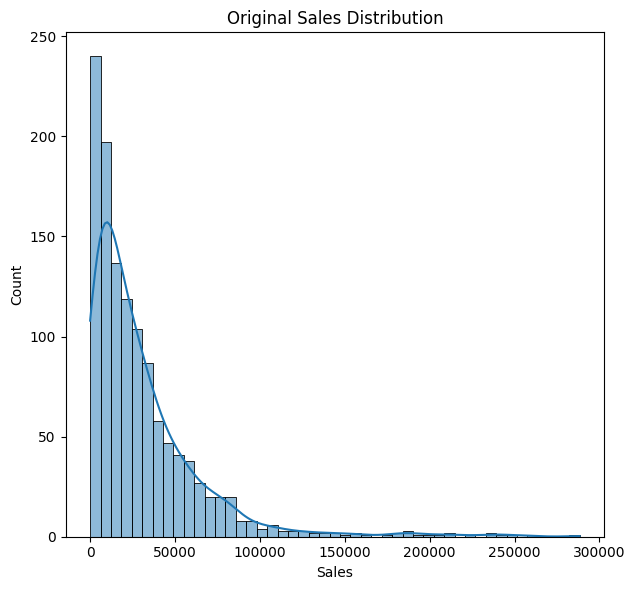

In [56]:
plt.figure(figsize=(12, 6))

# Original 'Sales' distribution
plt.subplot(1, 2, 1)
sns.histplot(data['Sales'], kde=True)
plt.title('Original Sales Distribution')
plt.xlabel('Sales')

plt.tight_layout()
plt.show()

In [57]:
skew(data["Price Discount (%)"])

0.4682949419034937

In [58]:
skew(data["In-Store Promo"])

0.11197082090784266

In [59]:
skew(data["Catalogue Promo"])

1.4062878115950632

In [60]:
skew(data["Store End Promo"])

0.634676061891439

In [61]:
skew(data["Google_Mobility"])

-2.544436025945939

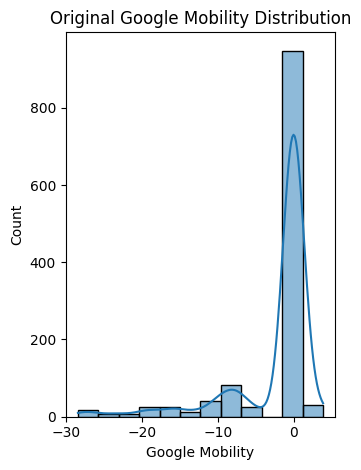

In [62]:
# Original 'Google_Mobility' distribution
plt.subplot(1, 2, 1)
sns.histplot(data['Google_Mobility'], kde=True)
plt.title('Original Google Mobility Distribution')
plt.xlabel('Google Mobility')

plt.tight_layout()
plt.show()

In [63]:
skew(data["Covid_Flag"])

1.3077646537185217

In [64]:
skew(data["V_DAY"])
#reasonable to have skewness due to specific holidays

6.920116977461381

In [65]:
skew(data["EASTER"])
#reasonable to have skewness due to specific holidays

6.920116977461381

In [66]:
skew(data["CHRISTMAS"])
#reasonable to have skewness due to specific holidays

7.0780740091502485

In [67]:
# Varubles Sales and Google_Mobility should be transformed due to high skewness
data['Sales_log'] = np.log(data['Sales'] + 1)
data['Google_Mobility_reflect_log'] = np.log(-data['Google_Mobility'] + abs(data['Google_Mobility'].min()) + 1)

data

,Product,date,Sales,Price Discount (%),In-Store Promo,Catalogue Promo,Store End Promo,Google_Mobility,Covid_Flag,V_DAY,EASTER,CHRISTMAS,Sales_log,Google_Mobility_reflect_log
0,SKU1,2017-02-05,27750,0.0,0,0,0,0.00,0,0,0,0,10.231027,3.384051
1,SKU1,2017-02-12,29023,0.0,1,0,1,0.00,0,1,0,0,10.275878,3.384051
2,SKU1,2017-02-19,45630,17.0,0,0,0,0.00,0,0,0,0,10.728343,3.384051
3,SKU1,2017-02-26,26789,0.0,1,0,1,0.00,0,0,0,0,10.195784,3.384051
4,SKU1,2017-03-05,41999,17.0,0,0,0,0.00,0,0,0,0,10.645425,3.384051
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1213,SKU6,2020-10-18,96619,54.0,0,1,0,-7.56,1,0,0,0,11.478541,3.612268
1214,SKU6,2020-10-25,115798,52.0,0,1,0,-8.39,1,0,0,0,11.659611,3.634423
1215,SKU6,2020-11-01,152186,54.0,1,0,1,-7.43,1,0,0,0,11.932865,3.608753
1216,SKU6,2020-11-08,26445,44.0,1,0,1,-5.95,1,0,0,0,10.182860,3.567841


## Normalization and Standardization

In [68]:
# Initialize the standard scaler
standard_scaler = StandardScaler()

# Sandardize the transformed columns
data['Sales_standardized'] = standard_scaler.fit_transform(data[['Sales_log']])
data['Google_Mobility_standardized'] = standard_scaler.fit_transform(data[['Google_Mobility_reflect_log']])

# Initialize the Min-Max scaler
minmax_scaler = MinMaxScaler()

# Normalize 'Price Discount (%)'
data['Price Discount (%)'] = minmax_scaler.fit_transform(data[['Price Discount (%)']])

# Drop the intermediate transformation columns
data.drop(['Sales_log', 'Google_Mobility_reflect_log'], axis=1, inplace=True)

data[['Sales_standardized', 'Google_Mobility_standardized', 'Price Discount (%)']].describe()

,Sales_standardized,Google_Mobility_standardized,Price Discount (%)
count,1.218000e+03,1.218000e+03,1218.000000
mean,-2.391811e-16,1.767606e-15,0.302461
std,1.000411e+00,1.000411e+00,0.259631
min,-5.180876e+00,-1.346665e+00,0.000000
25%,-3.775747e-01,-4.204763e-01,0.024096
50%,1.667918e-01,-4.204763e-01,0.301205
75%,5.523736e-01,-4.204763e-01,0.481928
max,1.616519e+00,3.993686e+00,1.000000


In [69]:
data

,Product,date,Sales,Price Discount (%),In-Store Promo,Catalogue Promo,Store End Promo,Google_Mobility,Covid_Flag,V_DAY,EASTER,CHRISTMAS,Sales_standardized,Google_Mobility_standardized
0,SKU1,2017-02-05,27750,0.000000,0,0,0,0.00,0,0,0,0,0.350880,-0.420476
1,SKU1,2017-02-12,29023,0.000000,1,0,1,0.00,0,1,0,0,0.375130,-0.420476
2,SKU1,2017-02-19,45630,0.204819,0,0,0,0.00,0,0,0,0,0.619771,-0.420476
3,SKU1,2017-02-26,26789,0.000000,1,0,1,0.00,0,0,0,0,0.331825,-0.420476
4,SKU1,2017-03-05,41999,0.204819,0,0,0,0.00,0,0,0,0,0.574939,-0.420476
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1213,SKU6,2020-10-18,96619,0.650602,0,1,0,-7.56,1,0,0,0,1.025391,1.069638
1214,SKU6,2020-10-25,115798,0.626506,0,1,0,-8.39,1,0,0,0,1.123293,1.214296
1215,SKU6,2020-11-01,152186,0.650602,1,0,1,-7.43,1,0,0,0,1.271037,1.046688
1216,SKU6,2020-11-08,26445,0.530120,1,0,1,-5.95,1,0,0,0,0.324837,0.779556


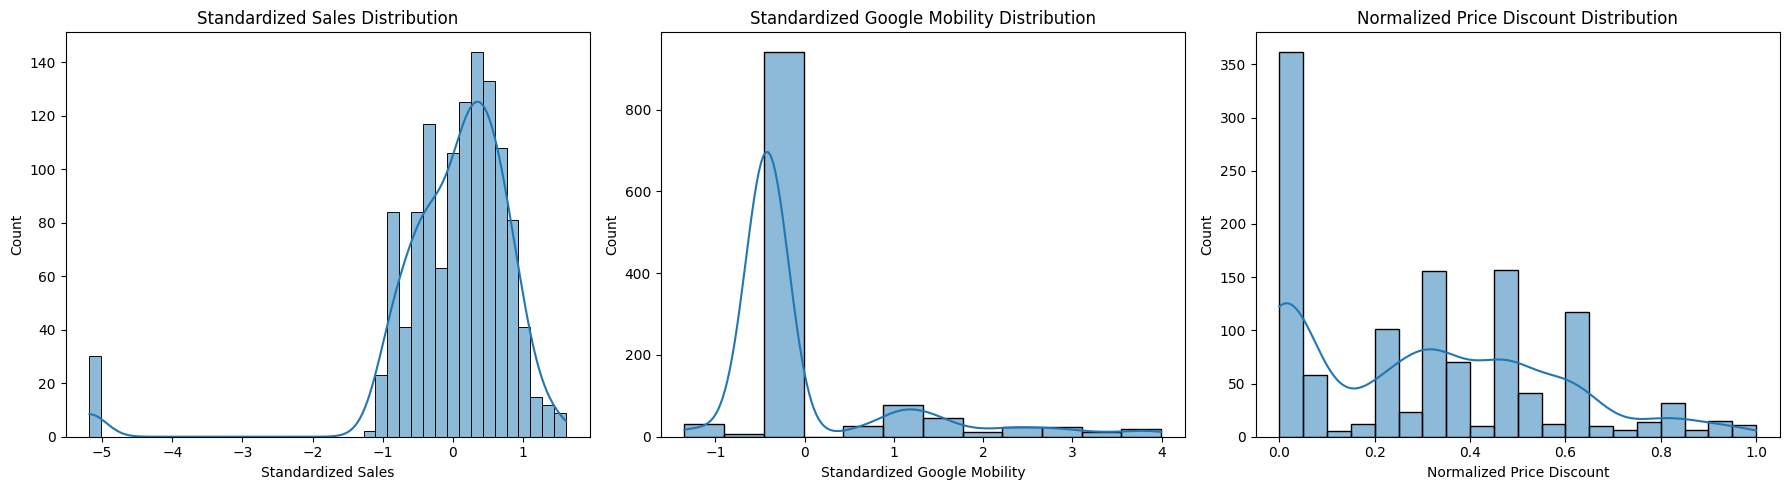

In [70]:
plt.figure(figsize=(18, 5))

# Plot for 'Sales_standardized'
plt.subplot(1, 3, 1)
sns.histplot(data['Sales_standardized'], kde=True)
plt.title('Standardized Sales Distribution')
plt.xlabel('Standardized Sales')

# Plot for 'Google_Mobility_standardized'
plt.subplot(1, 3, 2)
sns.histplot(data['Google_Mobility_standardized'], kde=True)
plt.title('Standardized Google Mobility Distribution')
plt.xlabel('Standardized Google Mobility')

# Plot for 'Price Discount (%)'
plt.subplot(1, 3, 3)
sns.histplot(data['Price Discount (%)'], bins=20, kde=True)
plt.title('Normalized Price Discount Distribution')
plt.xlabel('Normalized Price Discount')

plt.tight_layout()
plt.show()